The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

Using Linear Regression Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_df=pd.read_csv('1613615-Stock_Price_data_set.csv')
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
print(stock_df.info())  # Can see no null values are there.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


In [4]:
stock_df['Date']=pd.to_datetime(stock_df['Date'])

In [5]:
print(f"Dataframe contains stock prices between {stock_df.Date.min()} and {stock_df.Date.max()}")
print(f'Total days = {(stock_df.Date.max()- stock_df.Date.min()).days} days')

Dataframe contains stock prices between 2018-02-05 00:00:00 and 2022-02-04 00:00:00
Total days = 1460 days


In [6]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<AxesSubplot:>

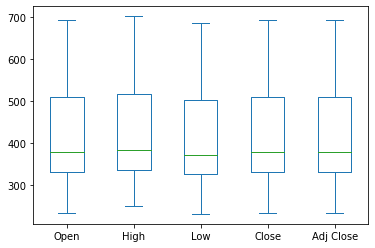

In [7]:
stock_df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

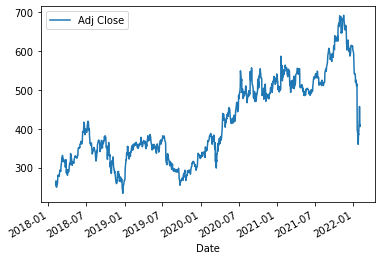

In [8]:
stock_df.plot(x='Date',y='Adj Close',kind='line')
plt.show()

In [9]:
# Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [10]:
# train and test splitting of data
X=np.array(stock_df.index).reshape(-1,1)
Y=stock_df['Adj Close']   
# Adj Close is the output variable. well, close and adj close are same in our dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
# taking test size as 30% of the total and random state of 100

In [11]:
# Feature Scaling
scaler=StandardScaler().fit(X_train)

In [12]:
# creating a linear Model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)

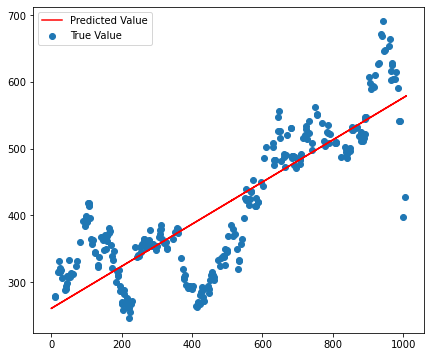

In [13]:
plt.figure(figsize=(7,6))
plt.scatter(X_test,Y_test,label='True Value')
plt.plot(X_train,y_pred_train,label='Predicted Value',c='red')
plt.legend()
plt.show()

In [14]:
r2_S1=r2_score(Y_train,y_pred_train)
print(r2_S1)
r2_S2=r2_score(Y_test,y_pred_test)
print(r2_S2)

0.7134473715683503
0.6911806983142699


In [15]:
mse1=mse(Y_train,lm.predict(X_train))
print(mse1)
mse2=mse(Y_test,lm.predict(X_test))
print(mse2)

3404.6522035286016
3457.68421769163


Insights:
The model score id is 0.6911806983142699
Its like the accuracy shown by the linear regression model is 69.11%